In [ ]:
%%sh
cat > pi-mpi.c << EOF


#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

int main(int argc, char *argv[]) {
	int i,np,lp;
	int tag=50;
	MPI_Status status;
	MPI_Init(&argc, &argv);
	MPI_Comm_rank(MPI_COMM_WORLD, &np);
	MPI_Comm_size(MPI_COMM_WORLD, &lp);

	if (np == 0) {
		double suma = 0, s=0, n = 1.0;
    printf("\nObliczanie równoległe liczby PI z wzoru Leibniza dla %d procesów", lp);
		for(i=0;i<lp;i++)
		{
      MPI_Send(&n, 1, MPI_DOUBLE, i,tag, MPI_COMM_WORLD);
      n++;
		}

		for(i=0;i<lp;i++)
		{
			MPI_Recv(&s, 1, MPI_DOUBLE, i, tag,MPI_COMM_WORLD, &status);
			suma+=s;
		}
		printf("\nWynik = %lf\n", 4 * suma );
	}
	else
	{
		double s;
    double n;

    MPI_Recv(&n, 1, MPI_DOUBLE, 0, tag,MPI_COMM_WORLD, &status);

		s = pow(-1.0, n-1) / (2*n-1);
		MPI_Send(&s, 1, MPI_DOUBLE, 0,tag, MPI_COMM_WORLD);
	}
	MPI_Finalize();
}
EOF
mpicc pi-mpi.c -lm && mpirun -n 256 --allow-run-as-root a.out 


Obliczanie równoległe liczby PI z wzoru Leibniza dla 256 procesów
Wynik = 3.137686


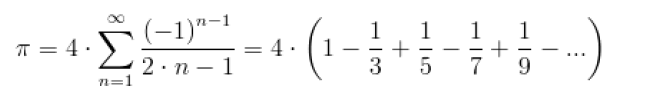

In [ ]:
%%sh 
cat > pi-mpi.c << EOF
#include<mpi.h>
#include<stdio.h>
double funkcja(double x) {
return x * x;
}
int main(int argc, char *argv[]) {
  int i,np,lp;
  int tag=50;
  MPI_Status status;
  MPI_Init(&argc, &argv);
  MPI_Comm_rank(MPI_COMM_WORLD, &np);
  MPI_Comm_size(MPI_COMM_WORLD, &lp);
//jeśli proces ma numer 0 to:
  if (np == 0) {
//Tworzenie zmiennych lokalnych
    double dx,xp,xk,pole,pole2,s=0,s2=0;
//Poczatek przedzialu calkowania xp
    xp = 1.0;
//Koniec przedzialu calkowania xk
    xk = 4.0;
    printf("\nObliczanie całki oznaczonej metodą trapezów dla funkcji x^2, w przedziale %.2f, %.2f",xp, xk);
// obliczanie wartości dx
    dx=(xk-xp)/(double)lp;
// wysylanie wartosci xp, xk oraz dx do poszczegolnych procesow
    for(i=0;i<lp;i++) {
      MPI_Send(&xp, 1, MPI_DOUBLE, i,tag, MPI_COMM_WORLD);
      MPI_Send(&xk, 1, MPI_DOUBLE, i,tag, MPI_COMM_WORLD);
      MPI_Send(&dx, 1, MPI_DOUBLE, i,tag, MPI_COMM_WORLD);
      }
// odbieranie oraz sumowanie wyników z wszystkich procesów
      for(i=0;i<lp;i++) {
        MPI_Recv(&s, 1, MPI_DOUBLE, i, tag,MPI_COMM_WORLD, &status);
        MPI_Recv(&s2, 1, MPI_DOUBLE, i, tag,MPI_COMM_WORLD, &status);
        pole+=s;
        pole2+=s2;
        }
        pole = (pole + (funkcja(xp) + funkcja(xk))/2)*dx;
// wypisanie wartości pola
      printf("\nPole pod całką wynosi = %lf\n",pole);
      //printf("\nPole pod całką wynosi = %lf\n",pole2);
      }
      else
      {
//tworzenie zmiennych lokalnych
        double s,s2,dx,xp,xk;
// odbieranie wartości od procesu 0
        MPI_Recv(&xp, 1, MPI_DOUBLE, 0, tag,MPI_COMM_WORLD, &status);
        MPI_Recv(&xk, 1, MPI_DOUBLE, 0, tag,MPI_COMM_WORLD, &status);
        MPI_Recv(&dx, 1, MPI_DOUBLE, 0, tag,MPI_COMM_WORLD, &status);
// obliczanie pola trapezu i prostokąta dla podanej funkcji
        s=funkcja(dx*np+xp);
        s2=funkcja(dx*np+xp)*dx;
//wysyłanie pola trapezów i prostokątów do procesu 0
        MPI_Send(&s, 1, MPI_DOUBLE, 0,tag, MPI_COMM_WORLD);
        MPI_Send(&s2, 1, MPI_DOUBLE, 0,tag, MPI_COMM_WORLD);
  }
  MPI_Finalize();
}
EOF
mpicc pi-mpi.c && mpirun -n 100 --allow-run-as-root a.out


Obliczanie całki oznaczonej metodą trapezów dla funkcji x^2, w przedziale 1.00, 4.00
Pole pod całką wynosi = 21.030450


In [ ]:
%%sh
cat > pi-mpi1.c << EOF
#include <stdlib.h>
#include <stdio.h>
#include <time.h>
#define NCOLS 3
int main(int argc, char *argv[])
{
int i,j,k,l;
int ierr,rank,size,root;
float A[NCOLS][NCOLS];
float B[NCOLS];
float C[NCOLS];
/*Initializacja macierzy A i B*/
srand(time(NULL));
for(int row=0;row<NCOLS;row++){
for(int col=0;col<NCOLS;col++){
A[row][col]=rand()%10;
}
}
for(int row=0;row<NCOLS;row++){
B[row]=rand()%10;
}
printf("Macierz A:\n");
for(int i=0;i<NCOLS;i++){
for(int j=0;j<NCOLS;j++){
printf("%g ",A[i][j]);
}
printf("\n");
}
printf("\n");
printf("Wektor B:\n");
for(int i=0;i<NCOLS;i++){
printf("%g \n",B[i]);
}
printf("\n");
/*Mnozenie sekwencyje*/
for(int i=0;i<NCOLS;i++){
C[i]=0.0;
for(int j=0;j<NCOLS;j++){
C[i]+=A[i][j]*B[j];
}
}
printf("Macierz wynikowa C:\n");
for(int i=0;i<NCOLS;i++){
printf("%g \n",C[i]);
}
printf("\n");
}
EOF
gcc pi-mpi1.c -o output
./output

Macierz A:
4 9 2 
1 9 9 
8 7 4 

Wektor B:
2 
4 
6 

Macierz wynikowa C:
56 
92 
68 



In [ ]:
%%sh
cat > pi-mpi.c << EOF
#include <stdlib.h>
#include <stdio.h>
#include <mpi.h>
#include <time.h>
#include <sys/time.h>
/*Przyjmujemy,zeproces0 to proces Root,który rozdzielawiersze
ikolumnymacierzyB,CpomiędzyprocesyroboczeSlavewykonujące obliczeniacząstkowe mnożenia macierzy. Procesy Slavezwracają wyniki doprocesuRoot,zktórychskłada macierz wynikowąA */
//LiczbawierszyikolumnwmacierzachA,B,C
#define N 5
MPI_Status status;
double A[N][N],B[N],C[N];
int main(int argc,char **argv) {
int processCount,processId,slaveTaskCount,source,dest,rows,offset;
struct timeval start, stop;
//InicjalizacjasrodowiskaMPI
MPI_Init(&argc,&argv);
//Uzyskanienumeru aktualnegoprocesu
MPI_Comm_rank(MPI_COMM_WORLD,&processId);
//Uzyskanie liczbywszystkichprocesów
MPI_Comm_size(MPI_COMM_WORLD,&processCount);
//LiczbaprocesówSlavemniejszao1nizprocessCount
slaveTaskCount=processCount-1;
//Przyjęto,zeproces0Root(Master)-poniżejjegokod
if(processId==0){
double start=MPI_Wtime();
//Inicjalizacja macierzy A i B
srand(time(NULL));
for(int i=0;i<N;i++){
for(int j=0;j<N;j++){
A[i][j]=rand()%10;
}}
for(int i=0;i<N;i++){
B[i]=rand()%10;
}
//Wypisanie zawartości macierzy A i B
printf("\nMnozenie macierzy za pomoca MPI\n");
printf("\nMacierz A\n\n");
for(int i=0;i<N;i++){
for(int j=0;j<N;j++){
printf("%.0f\t",A[i][j]);
}
printf("\n");
}
printf("\nWektor B\n\n");
for(int i=0;i<N;i++){
printf("%.0f\t\n",B[i]);
}
//OkresleneliczbywierzymacierzyA,którazostaniewysłana okażdego
//zprocesówSlave
rows=N/slaveTaskCount;
//Zmiennaoffsetokreślaaktualnypierwszy z wierszy dowysłaniado
//aktualnegoprocesuSlave
offset=0;
//Przygotowujemywierszeikolumnydowysłaniadokolejnychprocesów
//SlaveoIdod1doslaveTaskCount,zostanąoneprzesłanewiadomością //ztag1
for(dest=1;dest<=slaveTaskCount;dest++)
{
//Przesylamyoffsetwzledemwiersza0
MPI_Send(&offset,1,MPI_INT,dest,1,MPI_COMM_WORLD);
//Ilewierszyprzesylamy
MPI_Send(&rows,1,MPI_INT,dest,1,MPI_COMM_WORLD);
//przesylamywierszemacierzyAdoprocesowSlave
MPI_Send(&A[offset][0],rows*N,MPI_DOUBLE,dest,1,MPI_COMM_WORLD);
//PrzesylamykolumnymacierzyBdoprocesowSlave
MPI_Send(&B,N*N,MPI_DOUBLE,dest,1,MPI_COMM_WORLD);
//Modyfikujemyaktualnąwartośćzmiennejoffset
offset=offset+rows;
}
//ProcesRootczekaażprocesySlaveobliczącząstkoweiloczynywierszy
//ikolumnzmacierzyAiB,wynikizostanąodebranezwiadomościach
//ztag2
for(int i=1;i<=slaveTaskCount;i++)
{
source=i;
//ProcesRoototrzymujeoffsetodaktualnegoprocesuSlave
MPI_Recv(&offset,1,MPI_INT,source,2,MPI_COMM_WORLD,&status);
//ProcesRoototrzymujeliczbęwierszy,którąotrzymaodaktualnego
//procesuSlave
MPI_Recv(&rows,1,MPI_INT,source,2,MPI_COMM_WORLD,&status);
//Otrzymaniedanychcząstkowychz mnożenia A*BdoC
MPI_Recv(&C[offset],rows*N,MPI_DOUBLE,source,2,MPI_COMM_WORLD,&status);
}
//WypisaniemacierzywynikowejC
printf("\nWynikowa macierz C=A*B:\n\n");
for(int i=0;i<N;i++){
printf("%.0f\t",C[i]);
printf("\n");
}
printf("\n");
double end=MPI_Wtime();
printf("Czas obliczen %f",end-start);
} //Koniec kodu procesu Root
//KoddowykonaniaprzezprocesySlave
if(processId>0){
//PodanieprocesomSlavenumeruprocesuRoot
source=0;
//ProcesySlaveczekająnawiadomościztag1odprocesuRoot
//KażdyzprocesówSlavewykonujeoddzielnienastępującykod
//ProcesySlaveotrzymująwartośćoffsetuodprocesuRoot
MPI_Recv(&offset,1,MPI_INT,source,1,MPI_COMM_WORLD,&status);
//ProcesySlaveotrzymująliczbęwierszy,którazostanieprzesłanaod
//procesuRoot
MPI_Recv(&rows,1,MPI_INT,source,1,MPI_COMM_WORLD,&status);
//ProcesySlaveotrzymująfragmentymacierzyAodprocesuRoot
MPI_Recv(&A,rows*N,MPI_DOUBLE,source,1,MPI_COMM_WORLD,&status);
//ProcesySlaveotrzymująfragmentymacierzyBodprocesuRoot
MPI_Recv(&B,N*N,MPI_DOUBLE,source,1,MPI_COMM_WORLD,&status);
//Mnożeniemacierzy
for(int k=0;k<N;k++){
for(int i=0;i<rows;i++){
//
C[i]=0.0;
//Element A[i][j]mnożonyprzezB[j][k]
for(int j=0;j<N;j++)
C[i]+=A[i][j]*B[j];
}
}
//Wyniki cząstkowe sąwysyłanezprocesówSlavedoprocesu Rootwiadomościamiztag2
//Offsetzostaniewysłany doRoot
MPI_Send(&offset,1,MPI_INT,0,2,MPI_COMM_WORLD);
//Liczbawierszyzostaniewysłana doRoot
MPI_Send(&rows,1,MPI_INT,0,2,MPI_COMM_WORLD);
//Wyznaczony fragmentmacierzyCzostaniewysłanydoRoot
MPI_Send(&C,rows*N,MPI_DOUBLE,0,2,MPI_COMM_WORLD);
}
MPI_Finalize();
}
EOF
mpicc pi-mpi.c && mpirun -n 2 --allow-run-as-root a.out


Mnozenie macierzy za pomoca MPI

Macierz A

7	0	0	4	7	
7	7	0	1	5	
7	7	9	5	2	
0	0	1	2	0	
6	1	8	7	1	

Wektor B

1	
1	
3	
6	
1	

Wynikowa macierz C=A*B:

38	
25	
73	
15	
74	

Czas obliczen 0.000663